In [6]:
pip install spotipy

Note: you may need to restart the kernel to use updated packages.


In [8]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
##hide cred when posted 

CID = config['id']
SECRET = config['secret']
        

## for other users please replace CID and SECRET with your creds
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager
=
client_credentials_manager)

In [9]:
#artist_name = []
#track_name = []
#popularity = []
#track_id = []
#for i in range(0,1000,50):
 #   track_results = sp.search(q='year:2018', type='track', limit=50,offset=i)
  #  for i, t in enumerate(track_results['tracks']['items']):
   #     artist_name.append(t['artists'][0]['name'])
    #    track_name.append(t['name'])
     #   track_id.append(t['id'])
      #  popularity.append(t['popularity'])

In [10]:
#import pandas as pd
#track_dataframe = pd.DataFrame({'artist_name' : artist_name, 'track_name' : track_name, 'track_id' : track_id, 'popularity' : popularity})
#print(track_dataframe.shape)
#track_dataframe.head()

(1000, 4)


,artist_name,track_name,track_id,popularity
0,Juice WRLD,All Girls Are The Same,4VXIryQMWpIdGgYR4TrjT1,86
1,Juice WRLD,Lucid Dreams,285pBltuF7vW8TeWk8hdRR,88
2,Morgan Wallen,Whiskey Glasses,6foY66mWZN0pSRjZ408c00,81
3,Joji,SLOW DANCING IN THE DARK,0rKtyWc8bvkriBthvHKY8d,85
4,Travis Scott,SICKO MODE,2xLMifQCjDGFmkHkpNLD9h,88


In [11]:
sp.user_playlist_tracks("jonasfromfalun", "5kfE1hGYhu97qxW3n6h4S6")

{'href': 'https://api.spotify.com/v1/playlists/5kfE1hGYhu97qxW3n6h4S6/tracks?offset=0&limit=100&additional_types=track',
 'items': [{'added_at': '2013-01-19T16:55:27Z',
   'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/jonasfromfalun'},
    'href': 'https://api.spotify.com/v1/users/jonasfromfalun',
    'id': 'jonasfromfalun',
    'type': 'user',
    'uri': 'spotify:user:jonasfromfalun'},
   'is_local': False,
   'primary_color': None,
   'track': {'album': {'album_type': 'album',
     'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/4YYhVBJV1DG5yhNmX9rUFf'},
       'href': 'https://api.spotify.com/v1/artists/4YYhVBJV1DG5yhNmX9rUFf',
       'id': '4YYhVBJV1DG5yhNmX9rUFf',
       'name': 'Celestine Ukwu & His Philosophers National',
       'type': 'artist',
       'uri': 'spotify:artist:4YYhVBJV1DG5yhNmX9rUFf'}],
     'available_markets': ['AD',
      'AE',
      'AL',
      'AR',
      'AT',
      'AU',
      'BA',
      'BE',
      'B

In [12]:
def analyze_playlist(creator, playlist_id):
    
    # Create empty dataframe
    playlist_features_list = ["artist","album","track_name",  "track_id","danceability","energy","key","loudness","mode", "speechiness","instrumentalness","liveness","valence","tempo", "duration_ms","time_signature"]
    
    playlist_df = pd.DataFrame(columns = playlist_features_list)
    
    # Loop through every track in the playlist, extract features and append the features to the playlist df
    
    playlist = sp.user_playlist_tracks(creator, playlist_id)["items"]
    for track in playlist:
        # Create empty dict
        playlist_features = {}
        # Get metadata
        playlist_features["artist"] = track["track"]["album"]["artists"][0]["name"]
        playlist_features["album"] = track["track"]["album"]["name"]
        playlist_features["track_name"] = track["track"]["name"]
        playlist_features["track_id"] = track["track"]["id"]
        
        # Get audio features
        audio_features = sp.audio_features(playlist_features["track_id"])[0]
        for feature in playlist_features_list[4:]:
            playlist_features[feature] = audio_features[feature]
        
        # Concat the dfs
        track_df = pd.DataFrame(playlist_features, index = [0])
        playlist_df = pd.concat([playlist_df, track_df], ignore_index = True)
        
    return playlist_df

In [13]:
import pandas as pd
df = analyze_playlist("jonasfromfalun", "5kfE1hGYhu97qxW3n6h4S6")
df.head()




,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Celestine Ukwu & His Philosophers National,Celestine Ukwu & His Philosophers National,Na Nchekwube Mma Anyi Egbuna Anyi,6juKcgi75Q5uFWDyAZr1Mq,0.450,0.622,0,-5.849,1,0.0411,0.000010,0.1380,0.738,179.203,377640,3
1,T. P. Orchestre Poly-Rythmo,The Kings of Benin Urban Groove 1972 - 80,Gendamou Na Wili We Gnannin,3YLHbTeEBFvEBWZQATebxE,0.654,0.610,5,-9.846,0,0.0485,0.007190,0.0843,0.953,87.433,372347,4
2,Marijata,This Is Marijata,I Walk Alone,6sVm6ik1mXyXlDFexORZpQ,0.565,0.433,4,-14.970,0,0.0393,0.225000,0.0909,0.746,137.269,644440,4
3,Various Artists,"Golden Afrique, vol. 1 (Bolibana Collection)",Thiely,2QbgkbCilqYgE7uItsTmf0,0.813,0.566,1,-6.986,0,0.0588,0.000007,0.1730,0.957,147.427,249627,4
4,Various Artists,"Golden Afrique, vol. 1 (Bolibana Collection)",Yaye Boye,5acvGp7BKrh2pFw8WpgYNi,0.604,0.416,1,-8.559,0,0.0405,0.200000,0.1070,0.609,91.036,296000,4


In [14]:
df.to_csv("wow.csv", index = False)

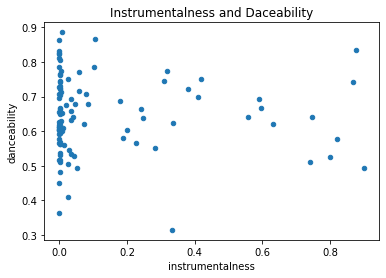

In [16]:
import numpy as np

import pandas as pd

from sklearn.model_selection import train_test_split

df.plot.scatter(x='instrumentalness', y='danceability', title='Instrumentalness and Danceability')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd9fd5514c0>,
      dtype=object)

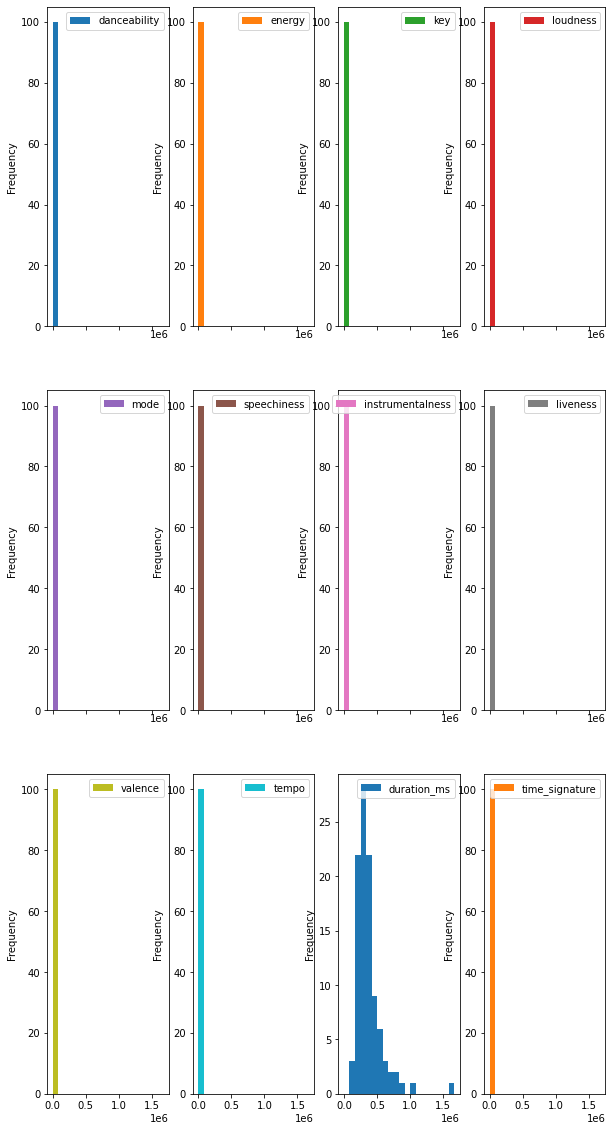

In [22]:
df.plot.hist(subplots=True, layout=(3,4), figsize=(10, 20), bins=20)


In [23]:
import seaborn as sns


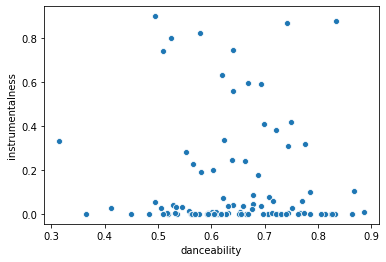

In [26]:
sns.scatterplot(x='danceability', y='instrumentalness', data=df)
